## IMPORTING REQUIRED MODULES

In [309]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import operator
import matplotlib.pyplot as plt
import networkx as nx 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import math

## READING THE DATA

In [244]:
data = pd.read_csv("C:\\Users\\Sai Kumar\\Desktop\\SEM-2\\IR\\ASSIGNMENT-6\\soc-sign-bitcoinalpha.csv")
data.head()

,source,target,weight,time stamp
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400


## NETWORK STATISITCS

In [279]:
def degree_cal(nodes,flag):
    temp_dict={}
    for i in nodes:
        if i not in temp_dict:
            temp_dict[i]=1
        else:
            temp_dict[i]+=1
    if(flag==-1):
        return temp_dict
    elif(flag==0):
        return sum(temp_dict.values())/3783
    elif(flag==1):
        temp_dict = dict(sorted(temp_dict.items(),key=operator.itemgetter(1),reverse=True))
        return list(temp_dict.keys())[0]
    else:
        #print("temp dict::",temp_dict)
        vals = list(temp_dict.values())
        dict2={}
        ## here we are calculating how many nodes are having a particular degree
        for i in vals:
            if i not in dict2:
                dict2[i]=1
            else:
                dict2[i]+=1
        return dict2

In [288]:
t = PrettyTable(["PARAMETER", "VALUE"])
## total number of nodes will be count of unique nodes in source and destination columns..
n = len(set(list(data['source'])+list(data['target'])))
t.add_row(["TOTAL NUMBER OF NODES IN THE NETWORK",n])
t.add_row(["-"*50,"-"*50])
## total number of edges will be number of entries in the data set as each entry bw source and destination represents edge..
t.add_row(["TOTAL NUMBER OF EDGES IN THE NETWORK",len(data)])
t.add_row(["-"*50,"-"*50])
## In-degree is computed for destination nodes..
t.add_row(["AVERAGE IN-DEGREE IN THE NETWORK",str(round(degree_cal(data['target'],0),2))+"\n(rounded off to two decimal places)"])
t.add_row(["-"*50,"-"*50])
## Out-degree is computed for source nodes...
t.add_row(["AVERAGE OUT-DEGREE IN THE NETWORK",str(round(degree_cal(data['source'],0),2))+"\n(rounded off to two decimal places)"])
t.add_row(["-"*50,"-"*50])
t.add_row(["NODE WITH MAXIMUM IN-DEGREE IN THE NETWORK",degree_cal(data['target'],1)])
t.add_row(["-"*50,"-"*50])
t.add_row(["NODE WITH MAXIMUM OUT-DEGREE IN THE NETWORK",degree_cal(data['source'],1)])
t.add_row(["-"*50,"-"*50])
t.add_row(["DENSITY OF THE NETWORK",str(round(len(data)/(n*(n-1)),3))+"\n(rounded off to two decimal places)"])
print(t)

+----------------------------------------------------+----------------------------------------------------+
|                     PARAMETER                      |                       VALUE                        |
+----------------------------------------------------+----------------------------------------------------+
|        TOTAL NUMBER OF NODES IN THE NETWORK        |                        3783                        |
| -------------------------------------------------- | -------------------------------------------------- |
|        TOTAL NUMBER OF EDGES IN THE NETWORK        |                       24186                        |
| -------------------------------------------------- | -------------------------------------------------- |
|          AVERAGE IN-DEGREE IN THE NETWORK          |                        6.39                        |
|                                                    |        (rounded off to two decimal places)         |
| --------------------------

## EDGE LIST REPRESENTATION OF THE NETWORK

In [252]:
edge_list=[]
for i in range(len(data)):
    edge_list.append((data.iloc[i,0],data.iloc[i,1]))
print("\n\t\t\t\t\tEDGE LIST REPRESENTATION OF THE NETWORK")
print("="*120)
print(edge_list)


					EDGE LIST REPRESENTATION OF THE NETWORK


[(7188, 1), (430, 1), (3134, 1), (3026, 1), (3010, 1), (804, 1), (160, 1), (95, 1), (377, 1), (888, 1), (89, 1), (1901, 1), (161, 1), (256, 1), (351, 1), (3329, 1), (3341, 1), (649, 1), (1583, 1), (87, 1), (37, 1), (309, 1), (821, 1), (1496, 1), (637, 1), (964, 1), (594, 1), (2249, 1), (554, 1), (20, 1), (2227, 1), (1315, 1), (519, 1), (1316, 1), (2149, 1), (1724, 1), (18, 1), (57, 1), (118, 1), (3254, 1), (1177, 1), (112, 1), (11, 1), (586, 1), (35, 1), (15, 1), (1445, 1), (152, 1), (2, 1), (113, 1), (44, 1), (2401, 1), (10, 1), (2378, 1), (126, 1), (3245, 1), (783, 1), (493, 1), (1358, 1), (1180, 1), (529, 1), (333, 1), (1538, 1), (2282, 1), (1519, 1), (2966, 1), (474, 1), (330, 1), (958, 1), (17, 1), (1295, 1), (38, 1), (1952, 1), (223, 1), (625, 1), (1392, 1), (3355, 1), (1881, 1), (58, 1), (96, 1), (1580, 1), (196, 1), (146, 1), (416, 1), (1198, 1), (3319, 1), (1867, 1), (896, 1), (617, 1), (3300, 1), (1877, 1), (462, 1), (3279, 1), (454, 1), (1860, 1), (121, 1), (151, 1), (1570, 

## ADJACENCY MATRIX REPRESENTATION OF NETWORK

In [248]:
indices = list(set(list(data['source'])+list(data['target'])))
columns = list(set(list(data['source'])+list(data['target'])))
adj_mtx = pd.DataFrame(index=indices, columns=columns)
adj_mtx = adj_mtx.fillna(0) ## intializing dataframe with zeroes instead of nan's
for i in edge_list:
    adj_mtx[i[0]][i[1]]=1
print("\n\t\t\t\t\t\tADJACENCY MATRIX")
print("="*120)
display(adj_mtx)


						ADJACENCY MATRIX


,1,2,3,4,5,6,7,8,9,10,...,7595,7596,7597,7598,7599,7600,7601,7602,7603,7604
1,0,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
5,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,1,0,1,0,0,...,1,0,0,1,1,1,1,1,0,1
8,0,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
9,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## IN-DEGREE DISTRIBUTION OF NODE

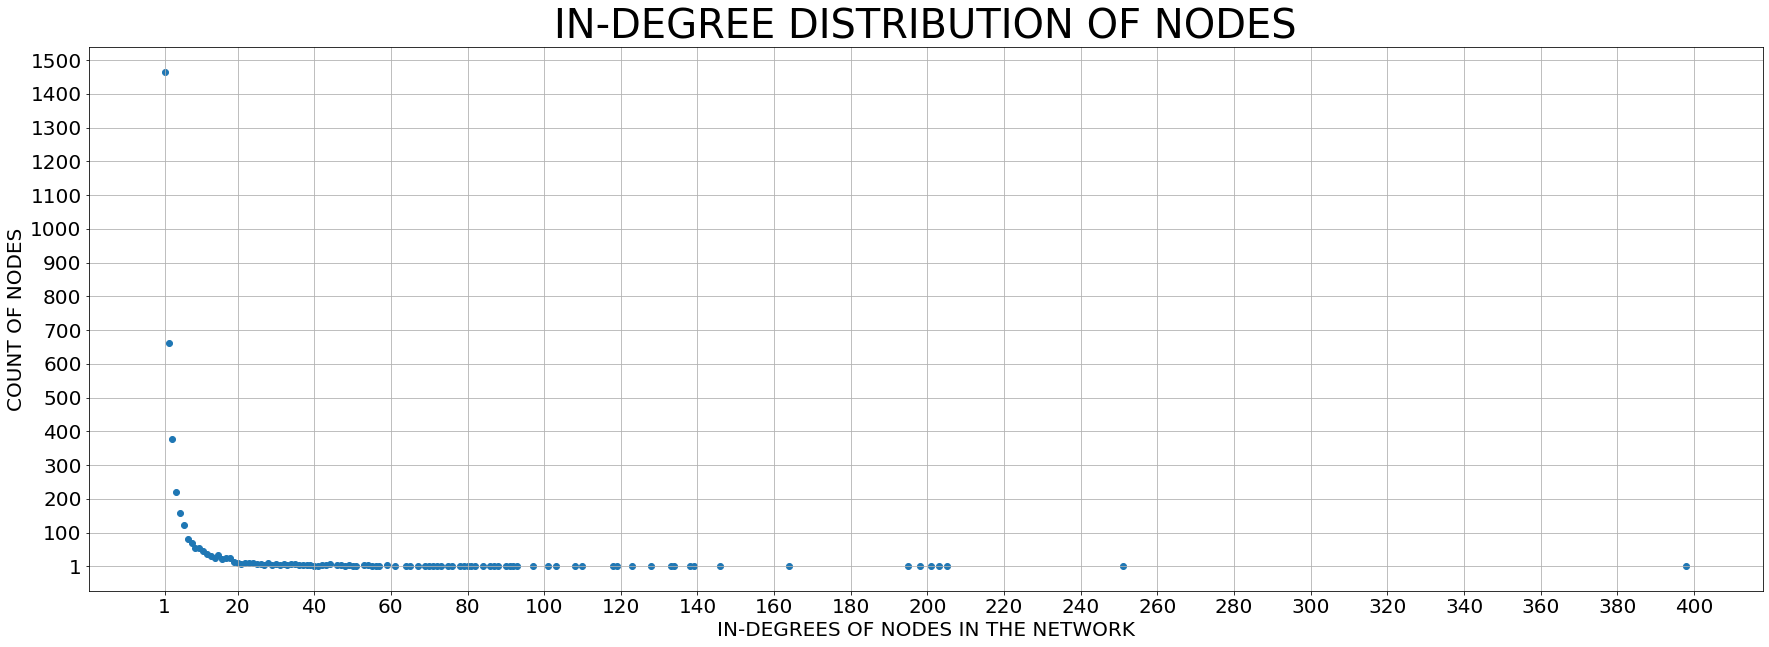

In [197]:
indegrees_vs_nodecount = degree_cal(data['target'],2)
plt.figure(figsize=[30,10])
x_vals=[]
for i in range(1,401):
    if(i%20==0 or i==1):
        x_vals.append(i)
y_vals=[]
for i in range(1,1501):
    if(i%100==0 or i==1):
        y_vals.append(i)
plt.scatter(list(indegrees_vs_nodecount.keys()),list(indegrees_vs_nodecount.values()))
plt.title("IN-DEGREE DISTRIBUTION OF NODES",fontsize=40)
plt.xlabel("IN-DEGREES OF NODES IN THE NETWORK",fontsize=20)
plt.xticks(x_vals,fontsize=20)
plt.yticks(y_vals,fontsize=20)
plt.ylabel("COUNT OF NODES",fontsize=20)
plt.grid()
plt.show()

## OUT-DEGREE DISTRIBUTION OF NODES

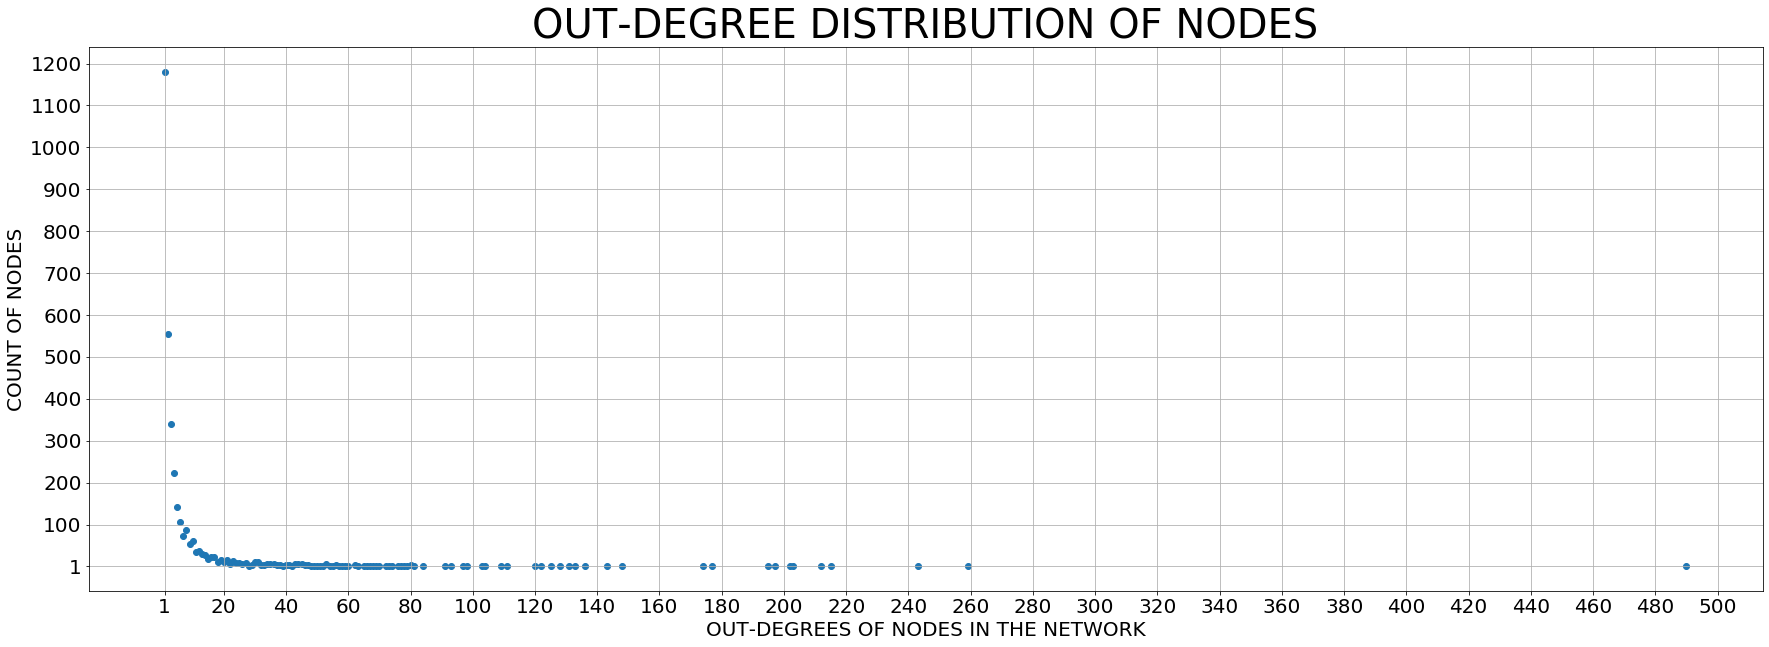

In [200]:
outdegrees_vs_nodecount = degree_cal(data['source'],2)
plt.figure(figsize=[30,10])
x_vals=[]
for i in range(1,501):
    if(i%20==0 or i==1):
        x_vals.append(i)
y_vals=[]
for i in range(1,1201):
    if(i%100==0 or i==1):
        y_vals.append(i)
plt.scatter(list(outdegrees_vs_nodecount.keys()),list(outdegrees_vs_nodecount.values()))
plt.title("OUT-DEGREE DISTRIBUTION OF NODES",fontsize=40)
plt.xlabel("OUT-DEGREES OF NODES IN THE NETWORK",fontsize=20)
plt.xticks(x_vals,fontsize=20)
plt.yticks(y_vals,fontsize=20)
plt.ylabel("COUNT OF NODES",fontsize=20)
plt.grid()
plt.show()

## CLUSTERING COEFFICIENT OF EACH NODE

In [332]:
#ref:https://www.youtube.com/watch?v=K2WF4pT5pFY
print("\n\t\t\t\t\t   CLUSTERING CO-EFFICIENTS OF THE NODES\n")
nodes = list(set(list(data['source'])+list(data['target'])))
clust_coeff={}
for i in tqdm(nodes,leave=True,position=0):
    neighb=[]
    N_v = 0
    for j in nodes:
        if adj_mtx[i][j]==1:
            neighb.append(j)
    for k in neighb:
        for k2 in neighb:
            if adj_mtx[k][k2]==1:
                N_v+=1
    try:
        clust_coeff[i] = (N_v)/(len(neighb)*(len(neighb)-1))
        ## total links really existing / maximum links that can be possible
    except:
        clust_coeff[i] = 0
t1 = PrettyTable(['NODE','CLUSTERING-COEFFICIENT'])
for i in dict(sorted(clust_coeff.items(),key=operator.itemgetter(1),reverse=True)):
    t1.add_row([i,clust_coeff[i]])
print(t1)


					   CLUSTERING CO-EFFICIENTS OF THE NODES



100%|██████████████████████████████████████████████████████████████████████████████| 3783/3783 [06:12<00:00, 10.16it/s]


+------+------------------------+
| NODE | CLUSTERING-COEFFICIENT |
+------+------------------------+
| 261  |          1.0           |
| 352  |          1.0           |
| 399  |          1.0           |
| 418  |          1.0           |
| 524  |          1.0           |
| 538  |          1.0           |
| 556  |          1.0           |
| 600  |          1.0           |
| 736  |          1.0           |
| 746  |          1.0           |
| 755  |          1.0           |
| 758  |          1.0           |
| 771  |          1.0           |
| 802  |          1.0           |
| 818  |          1.0           |
| 902  |          1.0           |
| 910  |          1.0           |
| 973  |          1.0           |
| 1023 |          1.0           |
| 1047 |          1.0           |
| 1057 |          1.0           |
| 1067 |          1.0           |
| 1091 |          1.0           |
| 1107 |          1.0           |
| 1112 |          1.0           |
| 1114 |          1.0           |
| 1168 |      

+------+------------------------+


In [336]:
count1=0
count0=0
for i in clust_coeff:
    if clust_coeff[i]==1:
        count1+=1
    if clust_coeff[i]==0:
        count0+=1
print("NODES WITH CLUSTERING COEFFICIENT 0::",count0)
print("NODES WITH CLUSTERING COEFFICIENT 1::",count1)

NODES WITH CLUSTERING COEFFICIENT 0:: 2317
NODES WITH CLUSTERING COEFFICIENT 1:: 173


In [335]:
print("CLUSTERING COEFFICIENT OF THE NETWORK::",sum(list(clust_coeff.values()))/len(nodes))

CLUSTERING COEFFICIENT OF THE NEETWORK:: 0.12635262321014096


## IN-DEGREE CENTRALITY OF THE NODES

In [333]:
print("\n\t\t\t\t\t   IN-DEGREE CENTRALITY OF THE NODES\n")
print("="*120)
indegree_cen = degree_cal(data['target'],-1)
nodes = list(set(list(data['source'])+list(data['target']))) or list(indegree_cen.keys())
for i in nodes:
    if i not in indegree_cen:
        indegree_cen[i]=0
t2 = PrettyTable(['NODE','IN-DEGREE'])
for i in dict(sorted(indegree_cen.items(),key=operator.itemgetter(1),reverse=True)):
    t2.add_row([i,indegree_cen[i]])
print(t2)


					   IN-DEGREE CENTRALITY OF THE NODES

+------+-----------+
| NODE | IN-DEGREE |
+------+-----------+
|  1   |    398    |
|  3   |    251    |
|  2   |    205    |
|  11  |    203    |
|  4   |    201    |
| 177  |    198    |
|  7   |    195    |
|  10  |    164    |
|  5   |    146    |
|  6   |    139    |
|  26  |    138    |
|  8   |    134    |
|  9   |    133    |
|  12  |    128    |
|  15  |    123    |
|  13  |    119    |
|  33  |    118    |
|  16  |    110    |
|  17  |    108    |
|  22  |    103    |
|  25  |    103    |
|  95  |    101    |
|  14  |     97    |
|  19  |     97    |
| 7603 |     93    |
| 7564 |     92    |
|  21  |     91    |
|  30  |     90    |
|  27  |     88    |
|  24  |     87    |
|  29  |     86    |
| 145  |     84    |
|  35  |     82    |
| 798  |     81    |
|  42  |     80    |
|  40  |     80    |
|  58  |     79    |
|  18  |     78    |
|  43  |     78    |
|  36  |     76    |
|  85  |     75    |
| 7604 |     73    |
|  31  |   

+------+-----------+


## OUT-DEGREE CENTRALITY OF THE NODES

In [334]:
print("\n\t\t\t\t\t   OUT-DEGREE CENTRALITY OF THE NODES\n")
print("="*120)
outdegree_cen = degree_cal(data['source'],-1)
nodes = list(set(list(data['source'])+list(data['target']))) or list(outdegree_cen.keys())
for i in nodes:
    if i not in outdegree_cen:
        outdegree_cen[i]=0
t3 = PrettyTable(['NODE','OUT-DEGREE'])
for i in dict(sorted(outdegree_cen.items(),key=operator.itemgetter(1),reverse=True)):
    t3.add_row([i,outdegree_cen[i]])
print(t3)


					   OUT-DEGREE CENTRALITY OF THE NODES

+------+------------+
| NODE | OUT-DEGREE |
+------+------------+
|  1   |    490     |
|  8   |    259     |
|  3   |    243     |
|  4   |    215     |
|  7   |    212     |
|  11  |    203     |
| 177  |    202     |
|  15  |    197     |
|  2   |    195     |
|  10  |    177     |
|  5   |    174     |
|  22  |    148     |
|  6   |    148     |
|  9   |    143     |
|  33  |    136     |
|  26  |    133     |
|  58  |    131     |
|  12  |    128     |
|  30  |    125     |
|  13  |    125     |
|  95  |    122     |
|  16  |    120     |
|  17  |    111     |
|  25  |    109     |
|  24  |    104     |
|  19  |    103     |
|  43  |     98     |
|  85  |     97     |
|  14  |     93     |
| 129  |     93     |
|  21  |     91     |
|  40  |     84     |
| 2336 |     81     |
|  38  |     80     |
|  42  |     80     |
| 5342 |     80     |
|  36  |     79     |
|  18  |     78     |
|  51  |     77     |
| 7564 |     76     |
|  45  | 

+------+------------+


## COMPUTING PAGERANK SCORES 

In [323]:
G = nx.DiGraph() 
G.add_edges_from(edge_list) 
page_rank_scores = nx.pagerank(G)

In [328]:
print("\n\t\t\t\t\t   PAGE-RANK SCORES\n")
print("="*120)
print(dict(sorted(page_rank_scores.items(),key=operator.itemgetter(1),reverse=True)))


					   PAGE-RANK SCORES



{1: 0.016993099228405292, 3: 0.008960320960927014, 4: 0.008023439583332513, 2: 0.0066231832832233375, 177: 0.006607811108334509, 7: 0.006543114032848893, 11: 0.006192044052141409, 10: 0.005598872299087015, 13: 0.005287958636203423, 6: 0.004780121390485108, 16: 0.004707642392717352, 5: 0.004622857702795663, 7564: 0.004203501017394427, 9: 0.004200846400007224, 8: 0.004107053817032611, 12: 0.004083127744453426, 26: 0.0039019566135912753, 33: 0.003606231563084478, 14: 0.0035589459835260726, 798: 0.003507194907540784, 17: 0.003495447122947391, 18: 0.0034018120194040016, 25: 0.003366926463452764, 22: 0.0033578456422887156, 15: 0.003286117909070405, 79: 0.0032814003133206982, 7603: 0.0032054173740647123, 95: 0.002948042055839976, 69: 0.0029280431902535906, 40: 0.0028759663345321314, 21: 0.0028670672239916864, 23: 0.0027621295735930852, 30: 0.0027393055183080562, 27: 0.00268384322969599, 57: 0.002619249813194172, 19: 0.0026160666008117834, 58: 0.00260278770672031, 145: 0.0025221379014626934, 2

## GENERATING AUTHORITY SCORE AND HUB SCORE FOR EVERY NODE IN NETWORK

In [ ]:
### highly related web-pages to the given query are roots/authority scores..
### pages that are not very relevant but but point to authorritues are called hubs

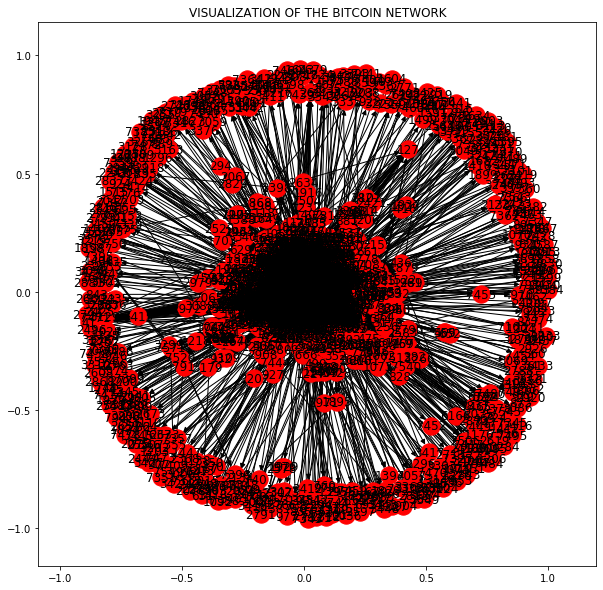

In [329]:
#ref:https://www.geeksforgeeks.org/hyperlink-induced-topic-search-hits-algorithm-using-networxx-module-python/
plt.figure(figsize =(10, 10))
plt.title("VISUALIZATION OF THE BITCOIN NETWORK")
nx.draw_networkx(G, with_labels = True)
hub_scores, authority_scores = nx.hits(G,normalized = True)

In [330]:
print("\n\t\t\t\t\t   HUB SCORES\n")
print("="*120)
print(dict(sorted(hub_scores.items(),key=operator.itemgetter(1),reverse=True)))


					   HUB SCORES



{11: 0.008537684146378718, 177: 0.0069610043633879385, 3: 0.0068841928868758435, 2: 0.006829069854496472, 7: 0.0067005241022419755, 8: 0.006528863504334652, 1: 0.0064088516365644315, 22: 0.006132935795890347, 10: 0.006024201182498987, 26: 0.005889592272392635, 24: 0.005540072414254607, 58: 0.00546994683729906, 95: 0.00544198036583848, 5: 0.005399418719920633, 30: 0.005350599951392969, 6: 0.005194347787695366, 19: 0.005059119020232108, 33: 0.005025729714269618, 85: 0.004953059533326474, 15: 0.004870427357673242, 9: 0.004860602173090094, 25: 0.004712132582187772, 4: 0.004691121478640904, 17: 0.004455626994995476, 43: 0.004345421028049623, 12: 0.004263498693882872, 21: 0.004179224971228584, 42: 0.004172923596950638, 32: 0.004034106748731866, 36: 0.0038080363896429545, 51: 0.003763388313850775, 29: 0.003485373462676724, 88: 0.0034612985649328334, 40: 0.0033525768544031124, 154: 0.0033159002481623653, 47: 0.0033078008055692195, 31: 0.0032788345216668837, 70: 0.003237748705468323, 67: 0.0031

In [331]:
print("\n\t\t\t\t\t   AUTHORITY SCORES\n")
print("="*120)
print(dict(sorted(authority_scores.items(),key=operator.itemgetter(1),reverse=True)))


					   AUTHORITY SCORES



{11: 0.0077489839735902805, 3: 0.0069533608643944835, 2: 0.00681199455141867, 177: 0.006191924885749605, 7: 0.0060590568914175415, 1: 0.005881193763593962, 26: 0.005754122352972832, 10: 0.005389497289307632, 5: 0.00504657421071364, 9: 0.004980701197927936, 24: 0.0049521885112465665, 8: 0.004879300311058208, 6: 0.0048171309043961, 95: 0.004673457088070035, 29: 0.004566712255379265, 19: 0.004532679241755887, 31: 0.00419539259947677, 42: 0.004170545806443817, 22: 0.0041292334157049205, 33: 0.004124227775817787, 4: 0.004089896516654834, 43: 0.004067548464244481, 25: 0.004009489947653647, 32: 0.003977640534079296, 21: 0.003934323394202373, 17: 0.003928190812986274, 15: 0.0038827702090233293, 145: 0.0038084418325084377, 12: 0.003807720156968241, 85: 0.0037939565053383235, 36: 0.003621013467926249, 51: 0.0034736044551958497, 47: 0.0033746106781864242, 30: 0.0033543021058363956, 41: 0.0033377473653706845, 14: 0.0031940616583407736, 7604: 0.003158914149452438, 27: 0.003157074513821999, 40: 0.00